In [3]:
import pandas as pd
import numpy as np
from arch import arch_model

# Load historical stock price data for all 15 companies into a dictionary
# Replace 'stock_data' with your actual data source, which can be a dictionary of DataFrames
stock_data = {
    'Asian_Paints': pd.read_csv('../ArchGarchDatasets/AsianPaints.csv', index_col=0),
    'Bharat_Petroleum': pd.read_csv('../ArchGarchDatasets/BharatPetroleum.csv', index_col=0),
    'HDFC_Bank': pd.read_csv('../ArchGarchDatasets/HdfcBank.csv', index_col=0),
    'Infosys': pd.read_csv('../ArchGarchDatasets/Infosys.csv', index_col=0),
    'JSW_Steel':pd.read_csv('../ArchGarchDatasets/Jswsteel.csv', index_col=0),
    'Nestle':pd.read_csv('../ArchGarchDatasets/Nestle.csv', index_col=0),
    'Reliance_Industries':pd.read_csv('../ArchGarchDatasets/RelianceIndustries.csv', index_col=0),
    'SBI': pd.read_csv('../ArchGarchDatasets/SbiBank.csv', index_col=0),
    'Tata_Motors':pd.read_csv('../ArchGarchDatasets/TataMotors.csv', index_col=0),
    'Tata_Steel':pd.read_csv('../ArchGarchDatasets/TataSteel.csv', index_col=0)
}
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

# Dictionary to store calculated volatilities for each company
volatility_results = {}

# Loop over each company's stock price data
for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  # Assuming 'Close' is the column containing closing prices
    best_aic, best_order,p_value,q_value = select_best_order(returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)
    
    # Fit GARCH model
    model = arch_model(returns, vol='Garch', p=p_value, q=q_value)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity
    
    # Forecast volatility for the next day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    # Store the result in the dictionary
    volatility_results[company] = forecast_volatility

# Print the dictionary containing calculated volatilities for each company
volatilities={}
print("Volatility Results:")
for company, volatility in volatility_results.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")

print(volatilities)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Asian_Paints -1635.745356969511
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000229. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000229. Parameter
estimat

Best AIC for: Bharat_Petroleum -1458.7546610362697
Best Order (p, q): (2, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001468. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001468. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: HDFC_Bank -1592.4503949445682
Best Order (p, q): (2, 2)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Infosys -1486.3446709494624
Best Order (p, q): (4, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001722. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: JSW_Steel -1534.5890690325255
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001224. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001224. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Nestle -1506.4688971406501
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Reliance_Industries -1592.7160203968256
Best Order (p, q): (2, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001804. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001804. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: SBI -1525.2242711182569
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Tata_Motors -1364.6903537756134
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001895. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001895. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC for: Tata_Steel -1508.5406765045084
Best Order (p, q): (1, 1)
Volatility Results:
Asian_Paints: 0.01068319176043105
Bharat_Petroleum: 0.01691802398400044
HDFC_Bank: 0.01310097761731082
Infosys: 0.011251837826624641
JSW_Steel: 0.013345322603930837
Nestle: 0.010670751307461234
Reliance_Industries: 0.030008067315138526
SBI: 0.013620858958666023
Tata_Motors: 0.014573578265695962
Tata_Steel: 0.012962166062332636
{'Asian_Paints': 0.01068319176043105, 'Bharat_Petroleum': 0.01691802398400044, 'HDFC_Bank': 0.01310097761731082, 'Infosys': 0.011251837826624641, 'JSW_Steel': 0.013345322603930837, 'Nestle': 0.010670751307461234, 'Reliance_Industries': 0.030008067315138526, 'SBI': 0.013620858958666023, 'Tata_Motors': 0.014573578265695962, 'Tata_Steel': 0.012962166062332636}


In [4]:
print(volatilities)

{'Asian_Paints': 0.01068319176043105, 'Bharat_Petroleum': 0.01691802398400044, 'HDFC_Bank': 0.01310097761731082, 'Infosys': 0.011251837826624641, 'JSW_Steel': 0.013345322603930837, 'Nestle': 0.010670751307461234, 'Reliance_Industries': 0.030008067315138526, 'SBI': 0.013620858958666023, 'Tata_Motors': 0.014573578265695962, 'Tata_Steel': 0.012962166062332636}


In [7]:
import numpy as np
import cvxpy as cp

num_stocks = len(volatilities)

print(num_stocks)
weights = cp.Variable(num_stocks)
print(weights)

10
var14


In [8]:
portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(volatilities.values()))))
print(portfolio_volatility)

power(QuadForm(var14, [[0.01 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.01]]), 0.5)


In [9]:
constraints = [cp.sum(weights) == 1, weights >= 0]

# Create optimization problem
problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
print(problem)

minimize power(QuadForm(var14, [[0.01 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.01]]), 0.5)
subject to Sum(var14, None, False) == 1.0
           0.0 <= var14


In [13]:
problem.solve(qcp=True)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvx

0.03792076047947345

In [14]:
optimized_weights = weights.value
for i, stock in enumerate(volatilities.keys()):
    print(f"{stock}: {optimized_weights[i]}")

Asian_Paints: 0.10342041174132675
Bharat_Petroleum: 0.09755951034621345
HDFC_Bank: 0.10072397335762583
Infosys: 0.10271948382758338
JSW_Steel: 0.10048757736175108
Nestle: 0.10343628573209225
Reliance_Industries: 0.09118617442649231
SBI: 0.10022759410929058
Tata_Motors: 0.09937817676609488
Tata_Steel: 0.10086081233152933


In [15]:
# Calculate portfolio risk contribution
portfolio_risk_contribution = {stock: optimized_weights[i] * volatilities[stock] for i, stock in enumerate(volatilities.keys())}

# Display portfolio composition
print("Portfolio Composition:")
for stock, weight in zip(volatilities.keys(), optimized_weights):
    print(f"{stock}: {weight * 100:.2f}%")

# Display portfolio risk contribution
print("\nPortfolio Risk Contribution:")
for stock, risk_contribution in portfolio_risk_contribution.items():
    print(f"{stock}: {risk_contribution * 100:.2f}%")

# Calculate and display total portfolio risk
portfolio_risk = sum(portfolio_risk_contribution.values())
print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")


Portfolio Composition:
Asian_Paints: 10.34%
Bharat_Petroleum: 9.76%
HDFC_Bank: 10.07%
Infosys: 10.27%
JSW_Steel: 10.05%
Nestle: 10.34%
Reliance_Industries: 9.12%
SBI: 10.02%
Tata_Motors: 9.94%
Tata_Steel: 10.09%

Portfolio Risk Contribution:
Asian_Paints: 0.11%
Bharat_Petroleum: 0.17%
HDFC_Bank: 0.13%
Infosys: 0.12%
JSW_Steel: 0.13%
Nestle: 0.11%
Reliance_Industries: 0.27%
SBI: 0.14%
Tata_Motors: 0.14%
Tata_Steel: 0.13%

Total Portfolio Risk: 1.45%


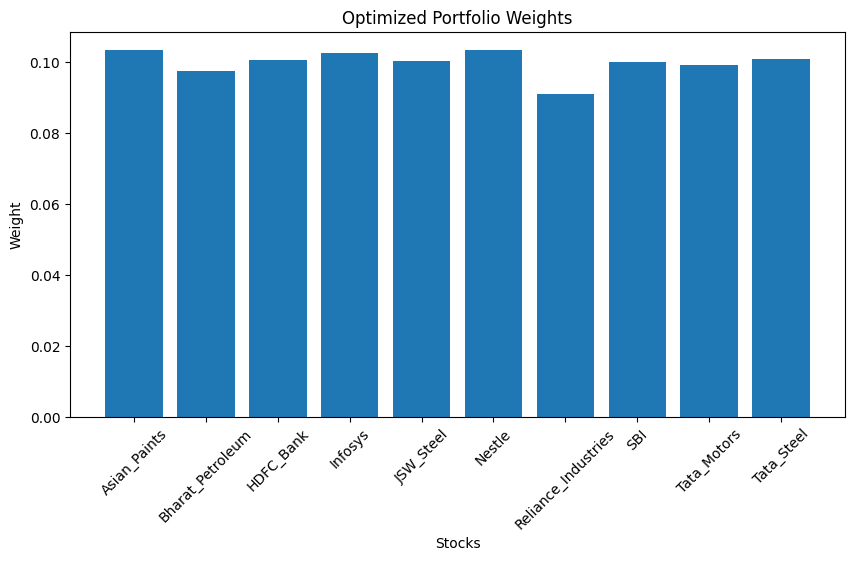

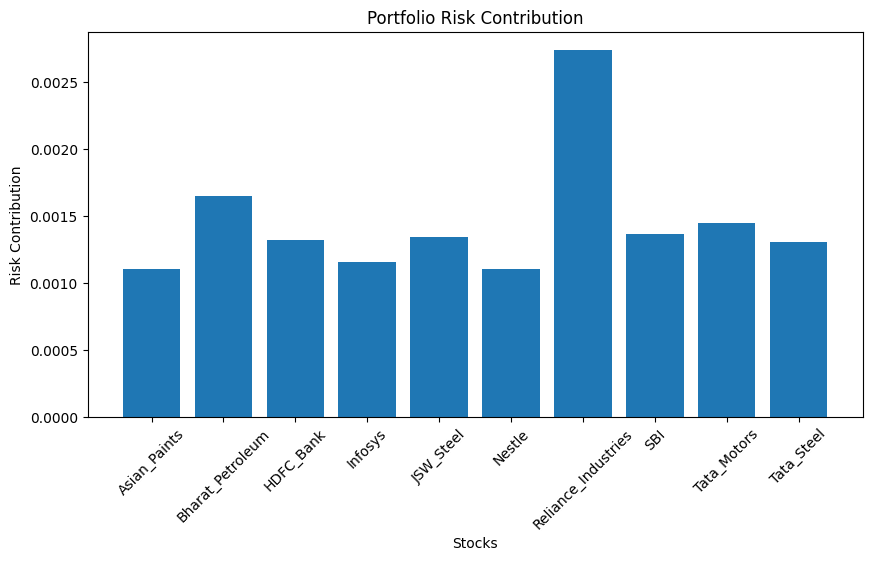

In [16]:
import matplotlib.pyplot as plt

# Plotting optimized weights
plt.figure(figsize=(10, 5))
plt.bar(volatilities.keys(), optimized_weights)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

# Plotting portfolio risk contribution
plt.figure(figsize=(10, 5))
plt.bar(portfolio_risk_contribution.keys(), portfolio_risk_contribution.values())
plt.title('Portfolio Risk Contribution')
plt.xlabel('Stocks')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=45)
plt.show()
